In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn
%matplotlib inline

In [2]:
df_math = pd.read_csv('/Users/ishanhanda/Downloads/student/student-mat.csv', sep = ';')
df_por = pd.read_csv('/Users/ishanhanda/Downloads/student/student-por.csv', sep = ';')
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
df_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Merge and clean data

In [4]:
df = pd.merge(df_math, df_por, how = 'outer')

#Create binary 0-1 for select columns
df['rural'] = (df['address'] == 'R').astype(int)
df = df.drop(['address'], axis = 1)
df['P_apart'] = (df['Pstatus'] == 'A').astype(int)
df = df.drop(['Pstatus'], axis = 1)
df['school_GP'] = (df['school'] == 'GP').astype(int)
df = df.drop(['school'], axis = 1)
df['female'] = (df['sex'] == 'F').astype(int)
df = df.drop(['sex'], axis = 1)
df['famsize_bin'] = (df['famsize'] == 'LE3').astype(int)
df = df.drop(['famsize'], axis = 1)

df['guardian_mother'] = (df['guardian'] == 'mother').astype(int)
df['guardian_father'] = (df['guardian'] == 'father').astype(int)
df = df.drop(['guardian'], axis = 1)

df['Mjob_at_home'] = (df['Mjob'] == 'at_home').astype(int)
df['Mjob_health'] = (df['Mjob'] == 'health').astype(int)
df['Mjob_teacher'] = (df['Mjob'] == 'teacher').astype(int)
df['Mjob_services'] = (df['Mjob'] == 'services').astype(int)
df = df.drop(['Mjob'], axis = 1)

df['Fjob_at_home'] = (df['Fjob'] == 'at_home').astype(int)
df['Fjob_health'] = (df['Fjob'] == 'health').astype(int)
df['Fjob_teacher'] = (df['Fjob'] == 'teacher').astype(int)
df['Fjob_services'] = (df['Fjob'] == 'services').astype(int)
df = df.drop(['Fjob'], axis = 1)

df['reason_home'] = (df['reason'] == 'home').astype(int)
df['reason_reputation'] = (df['reason'] == 'reputation').astype(int)
df['reason_course'] = (df['reason'] == 'course').astype(int)
df = df.drop(['reason'], axis = 1)

#Change yes/no to binary
df['schoolsup'] = (df['schoolsup'] == 'yes').astype(int)
df['famsup'] = (df['famsup'] == 'yes').astype(int)
df['paid'] = (df['paid'] == 'yes').astype(int)
df['activities'] = (df['activities'] == 'yes').astype(int)
df['nursery'] = (df['nursery'] == 'yes').astype(int)
df['higher'] = (df['higher'] == 'yes').astype(int)
df['internet'] = (df['internet'] == 'yes').astype(int)
df['romantic'] = (df['romantic'] == 'yes').astype(int)

df['Walc_bin'] = (df['Walc'] > 3).astype(int)
df['Dalc_bin'] = (df['Dalc'] > 1).astype(int)
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Mjob_services,Fjob_at_home,Fjob_health,Fjob_teacher,Fjob_services,reason_home,reason_reputation,reason_course,Walc_bin,Dalc_bin
0,18,4,4,2,2,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,17,1,1,1,2,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,15,1,1,1,2,3,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,15,4,2,1,3,0,0,1,1,1,...,0,0,0,0,1,1,0,0,0,0
4,16,3,3,1,2,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0


### Visualize the distributions

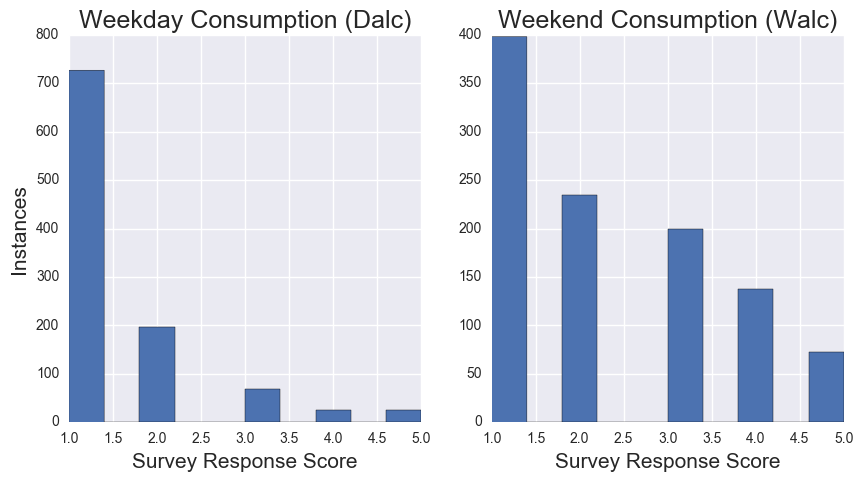

In [5]:
fig = plt.figure(figsize = (10,5))
fig.add_subplot(1,2,1)

    
df['Dalc'].hist()
plt.xlabel('Survey Response Score', fontsize = 15)
plt.ylabel('Instances', fontsize = 15)
plt.title('Weekday Consumption (Dalc)', fontsize = 18)


fig.add_subplot(1,2,2)
df['Walc'].hist()
plt.xlabel('Survey Response Score', fontsize = 15)
plt.title('Weekend Consumption (Walc)', fontsize = 18)


### Split the samples into train/test

In [6]:
X = df.drop(['Dalc', 'Walc', 'Walc_bin', 'Dalc_bin'], axis = 1)
y = df[['Dalc', 'Walc', 'Walc_bin', 'Dalc_bin']]
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2)

### Random Forest

Dalc Accuracy: 0.789473684211
Dalc Recall: 0.369230769231
Dalc Precision: 0.888888888889
Dalc F1 Score: 0.521739130435

Walc Accuracy: 0.866028708134
Walc Recall: 0.404761904762
Walc Precision: 0.85
Walc F1 Score : 0.548387096774


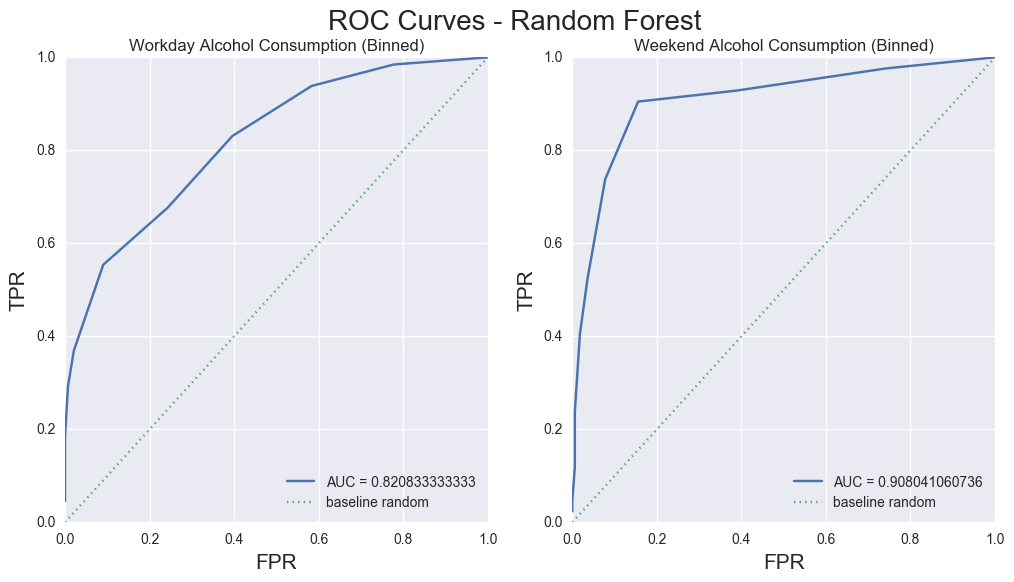

In [10]:
fig = plt.figure(figsize = (12,6))

fig.add_subplot(1,2,1)
lr = RandomForestClassifier(random_state=1)
lr.fit(X_train, y_train.Dalc_bin)
pred_Dalc = lr.predict_proba(X_test)
pred_D = lr.predict(X_test)
print('Dalc Accuracy: ' + str(lr.score(X_test, y_test.Dalc_bin)))
print('Dalc Recall: ' + str(metrics.recall_score(y_test.Dalc_bin, pred_D)))
print('Dalc Precision: ' + str(metrics.precision_score(y_test.Dalc_bin, pred_D)))
print('Dalc F1 Score: ' + str(metrics.f1_score(y_test.Dalc_bin, pred_D)) + '\n')

fpr_Dalc, tpr_Dalc, thresholds_Dalc = metrics.roc_curve(y_test.Dalc_bin, pred_Dalc[:,1])
auc_lr_Dalc = metrics.roc_auc_score(y_test.Dalc_bin, pred_Dalc[:,1])

plt.plot(fpr_Dalc,tpr_Dalc,label='AUC = ' + str(auc_lr_Dalc))
plt.plot(fpr_Dalc,fpr_Dalc,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('Workday Alcohol Consumption (Binned)', fontsize = 12)
plt.legend(loc = 4)


fig.add_subplot(1,2,2)
lr = RandomForestClassifier(random_state=1)
lr.fit(X_train, y_train.Walc_bin)
pred_Walc = lr.predict_proba(X_test)
pred_W = lr.predict(X_test)
print('Walc Accuracy: ' + str(lr.score(X_test, y_test.Walc_bin)))
print('Walc Recall: ' + str(metrics.recall_score(y_test.Walc_bin, pred_W)))
print('Walc Precision: ' + str(metrics.precision_score(y_test.Walc_bin, pred_W)))
print('Walc F1 Score : ' + str(metrics.f1_score(y_test.Walc_bin, pred_W)))

fpr_Walc, tpr_Walc, thresholds_Walc = metrics.roc_curve(y_test.Walc_bin, pred_Walc[:,1])
auc_lr_Walc = metrics.roc_auc_score(y_test.Walc_bin, pred_Walc[:,1])

plt.plot(fpr_Walc,tpr_Walc,label='AUC = ' + str(auc_lr_Walc))
plt.plot(fpr_Walc,fpr_Walc,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('Weekend Alcohol Consumption (Binned)', fontsize = 12)
plt.legend(loc = 4)
fig.suptitle('ROC Curves - Random Forest', fontsize = 20)

#### Optimize RF Hyper-parameters

In [8]:
def xValLR_f1_RF(X, Y, k, ns):
    from sklearn.cross_validation import KFold
    
    kfolds = KFold(X.shape[0], n_folds=k)
    f1s = {}
    
    for n in ns:
        f1_n = []
        for train, test in kfolds:
            lr = RandomForestClassifier(n_estimators=n, random_state=1)
            lr.fit(X.iloc[train, :], Y.iloc[train])
            pred = lr.predict(X.iloc[test,:])
            f1_n_k = metrics.f1_score(Y.iloc[test], pred)
            f1_n.append(f1_n_k)
    
        f1s[str(n)] = f1_n 
    return f1s

/Users/ishanhanda/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


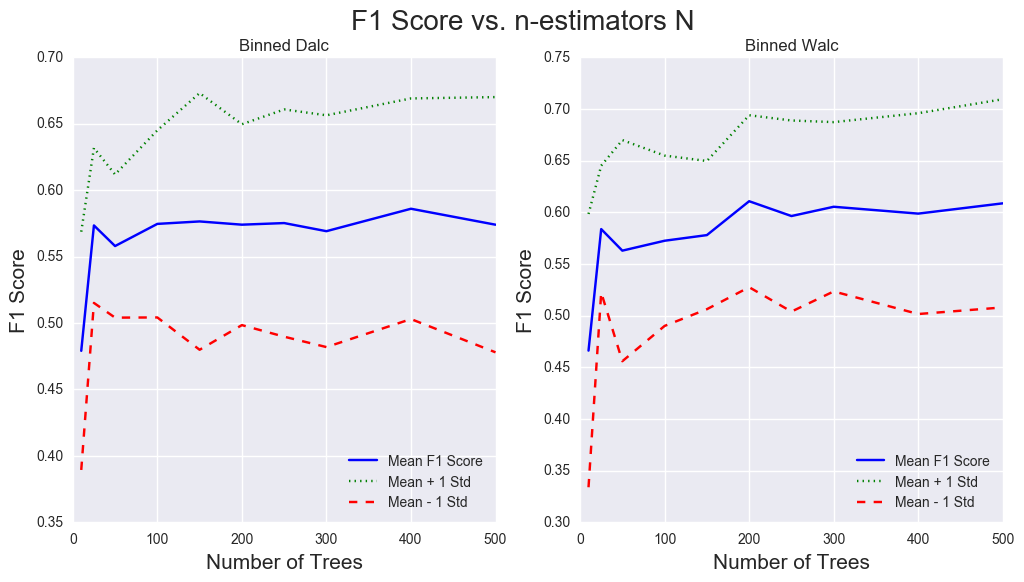

In [9]:
ns = [10, 25, 50, 100, 150, 200, 250, 300, 400, 500]
fig = plt.figure(figsize = (12,6))
fig.add_subplot(1,2,1)
f1s = xValLR_f1_RF(X_train,y_train.Dalc_bin, 5, ns)
mus = []
mu_plus = []
mu_minus = []
for n in ns:
    mu = np.array(f1s[str(n)]).mean()
    sig = np.array(f1s[str(n)]).std()
    
    mu_p = mu + sig
    mu_m = mu - sig
    mus.append(mu)
    mu_plus.append(mu_p)
    mu_minus.append(mu_m)
    
plt.plot(np.array(ns), mus, 'b', label = 'Mean F1 Score')
plt.plot(np.array(ns), mu_plus, 'g:', label = 'Mean + 1 Std')
plt.plot(np.array(ns), mu_minus, 'r--', label = 'Mean - 1 Std')
plt.xlabel('Number of Trees', fontsize = 15)
plt.ylabel('F1 Score', fontsize = 15)
plt.title('Binned Dalc', fontsize = 12)
plt.legend(loc = 4)

fig.add_subplot(1,2,2)
f1s = xValLR_f1_RF(X_train,y_train.Walc_bin, 5, ns)
mus = []
mu_plus = []
mu_minus = []
for n in ns:
    mu = np.array(f1s[str(n)]).mean()
    sig = np.array(f1s[str(n)]).std()
    
    mu_p = mu + sig
    mu_m = mu - sig
    mus.append(mu)
    mu_plus.append(mu_p)
    mu_minus.append(mu_m)
    
plt.plot(np.array(ns), mus, 'b', label = 'Mean F1 Score')
plt.plot(np.array(ns), mu_plus, 'g:', label = 'Mean + 1 Std')
plt.plot(np.array(ns), mu_minus, 'r--', label = 'Mean - 1 Std')
plt.xlabel('Number of Trees', fontsize = 15)
plt.ylabel('F1 Score', fontsize = 15)
plt.title('Binned Walc', fontsize = 12)
plt.legend(loc = 4)

fig.suptitle('F1 Score vs. n-estimators N', fontsize = 20)

Dalc Accuracy: 0.822966507177
Dalc Recall: 0.476923076923
Dalc Precision: 0.911764705882
Dalc F1 Score: 0.626262626263

Walc Accuracy: 0.88995215311
Walc Recall: 0.547619047619
Walc Precision: 0.851851851852
Walc F1 Score : 0.666666666667


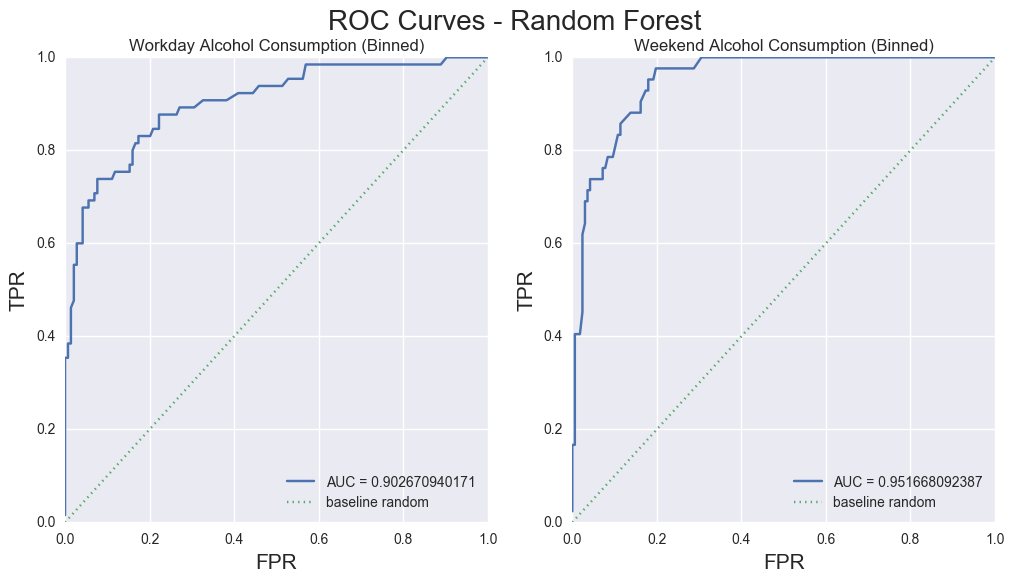

In [11]:
fig = plt.figure(figsize = (12,6))

fig.add_subplot(1,2,1)
lr = RandomForestClassifier(n_estimators=400, random_state=1)
lr.fit(X_train, y_train.Dalc_bin)
pred_Dalc = lr.predict_proba(X_test)
pred_D = lr.predict(X_test)
print('Dalc Accuracy: ' + str(lr.score(X_test, y_test.Dalc_bin)))
print('Dalc Recall: ' + str(metrics.recall_score(y_test.Dalc_bin, pred_D)))
print('Dalc Precision: ' + str(metrics.precision_score(y_test.Dalc_bin, pred_D)))
print('Dalc F1 Score: ' + str(metrics.f1_score(y_test.Dalc_bin, pred_D)) + '\n')

fpr_Dalc, tpr_Dalc, thresholds_Dalc = metrics.roc_curve(y_test.Dalc_bin, pred_Dalc[:,1])
auc_lr_Dalc = metrics.roc_auc_score(y_test.Dalc_bin, pred_Dalc[:,1])

plt.plot(fpr_Dalc,tpr_Dalc,label='AUC = ' + str(auc_lr_Dalc))
plt.plot(fpr_Dalc,fpr_Dalc,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('Workday Alcohol Consumption (Binned)', fontsize = 12)
plt.legend(loc = 4)


fig.add_subplot(1,2,2)
lr = RandomForestClassifier(n_estimators=200, random_state=1)
lr.fit(X_train, y_train.Walc_bin)
pred_Walc = lr.predict_proba(X_test)
pred_W = lr.predict(X_test)
print('Walc Accuracy: ' + str(lr.score(X_test, y_test.Walc_bin)))
print('Walc Recall: ' + str(metrics.recall_score(y_test.Walc_bin, pred_W)))
print('Walc Precision: ' + str(metrics.precision_score(y_test.Walc_bin, pred_W)))
print('Walc F1 Score : ' + str(metrics.f1_score(y_test.Walc_bin, pred_W)))

fpr_Walc, tpr_Walc, thresholds_Walc = metrics.roc_curve(y_test.Walc_bin, pred_Walc[:,1])
auc_lr_Walc = metrics.roc_auc_score(y_test.Walc_bin, pred_Walc[:,1])

plt.plot(fpr_Walc,tpr_Walc,label='AUC = ' + str(auc_lr_Walc))
plt.plot(fpr_Walc,fpr_Walc,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('Weekend Alcohol Consumption (Binned)', fontsize = 12)
plt.legend(loc = 4)
fig.suptitle('ROC Curves - Random Forest', fontsize = 20)

In [12]:
def xValLR_f1_RF_features(X, Y, k, ns, estimators):
    from sklearn.cross_validation import KFold
    
    kfolds = KFold(X.shape[0], n_folds=k)
    f1s = {}
    
    for n in ns:
        f1_n = []
        for train, test in kfolds:
            lr = RandomForestClassifier(n_estimators=estimators, max_features=n, random_state=1)
            lr.fit(X.iloc[train, :], Y.iloc[train])
            pred = lr.predict(X.iloc[test,:])
            f1_n_k = metrics.f1_score(Y.iloc[test], pred)
            f1_n.append(f1_n_k)
    
        f1s[str(n)] = f1_n 
    return f1s

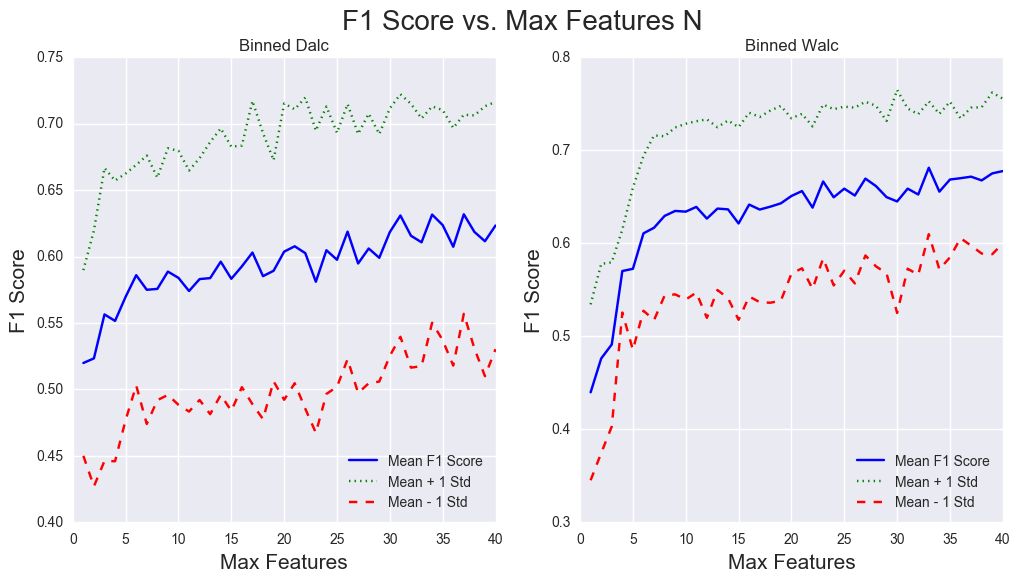

In [13]:
ns = range(1, X_train.shape[1] + 1)
fig = plt.figure(figsize = (12,6))
fig.add_subplot(1,2,1)
f1s = xValLR_f1_RF_features(X_train,y_train.Dalc_bin, 5, ns, estimators=400)
mus = []
mu_plus = []
mu_minus = []
for n in ns:
    mu = np.array(f1s[str(n)]).mean()
    sig = np.array(f1s[str(n)]).std()
    
    mu_p = mu + sig
    mu_m = mu - sig
    mus.append(mu)
    mu_plus.append(mu_p)
    mu_minus.append(mu_m)
    
plt.plot(np.array(ns), mus, 'b', label = 'Mean F1 Score')
plt.plot(np.array(ns), mu_plus, 'g:', label = 'Mean + 1 Std')
plt.plot(np.array(ns), mu_minus, 'r--', label = 'Mean - 1 Std')
plt.xlabel('Max Features', fontsize = 15)
plt.ylabel('F1 Score', fontsize = 15)
plt.title('Binned Dalc', fontsize = 12)
plt.legend(loc = 4)

fig.add_subplot(1,2,2)
f1s = xValLR_f1_RF_features(X_train,y_train.Walc_bin, 5, ns, estimators=200)
mus = []
mu_plus = []
mu_minus = []
for n in ns:
    mu = np.array(f1s[str(n)]).mean()
    sig = np.array(f1s[str(n)]).std()
    
    mu_p = mu + sig
    mu_m = mu - sig
    mus.append(mu)
    mu_plus.append(mu_p)
    mu_minus.append(mu_m)
    
plt.plot(np.array(ns), mus, 'b', label = 'Mean F1 Score')
plt.plot(np.array(ns), mu_plus, 'g:', label = 'Mean + 1 Std')
plt.plot(np.array(ns), mu_minus, 'r--', label = 'Mean - 1 Std')
plt.xlabel('Max Features', fontsize = 15)
plt.ylabel('F1 Score', fontsize = 15)
plt.title('Binned Walc', fontsize = 12)
plt.legend(loc = 4)

fig.suptitle('F1 Score vs. Max Features N', fontsize = 20)

Dalc Accuracy: 0.827751196172
Dalc Recall: 0.584615384615
Dalc Precision: 0.808510638298
Dalc F1 Score: 0.678571428571

Walc Accuracy: 0.8995215311
Walc Recall: 0.619047619048
Walc Precision: 0.838709677419
Walc F1 Score : 0.712328767123


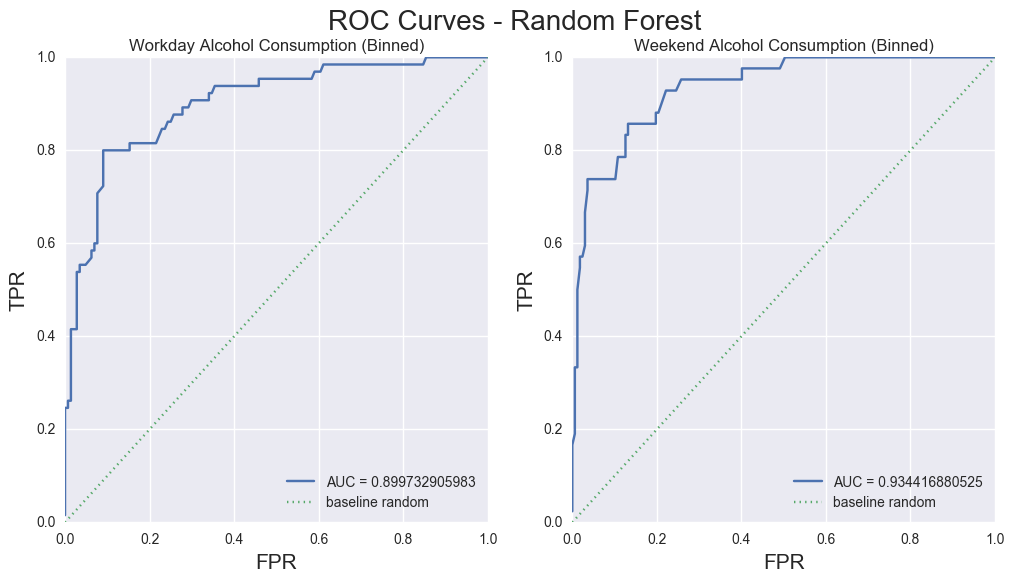

In [16]:
fig = plt.figure(figsize = (12,6))

fig.add_subplot(1,2,1)
lr = RandomForestClassifier(n_estimators=400, max_features=37, random_state=1)
lr.fit(X_train, y_train.Dalc_bin)
pred_Dalc = lr.predict_proba(X_test)
pred_D = lr.predict(X_test)
print('Dalc Accuracy: ' + str(lr.score(X_test, y_test.Dalc_bin)))
print('Dalc Recall: ' + str(metrics.recall_score(y_test.Dalc_bin, pred_D)))
print('Dalc Precision: ' + str(metrics.precision_score(y_test.Dalc_bin, pred_D)))
print('Dalc F1 Score: ' + str(metrics.f1_score(y_test.Dalc_bin, pred_D)) + '\n')

fpr_Dalc, tpr_Dalc, thresholds_Dalc = metrics.roc_curve(y_test.Dalc_bin, pred_Dalc[:,1])
auc_lr_Dalc = metrics.roc_auc_score(y_test.Dalc_bin, pred_Dalc[:,1])

plt.plot(fpr_Dalc,tpr_Dalc,label='AUC = ' + str(auc_lr_Dalc))
plt.plot(fpr_Dalc,fpr_Dalc,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('Workday Alcohol Consumption (Binned)', fontsize = 12)
plt.legend(loc = 4)


fig.add_subplot(1,2,2)
lr = RandomForestClassifier(n_estimators=200, max_features=33, random_state=1)
lr.fit(X_train, y_train.Walc_bin)
pred_Walc = lr.predict_proba(X_test)
pred_W = lr.predict(X_test)
print('Walc Accuracy: ' + str(lr.score(X_test, y_test.Walc_bin)))
print('Walc Recall: ' + str(metrics.recall_score(y_test.Walc_bin, pred_W)))
print('Walc Precision: ' + str(metrics.precision_score(y_test.Walc_bin, pred_W)))
print('Walc F1 Score : ' + str(metrics.f1_score(y_test.Walc_bin, pred_W)))

fpr_Walc, tpr_Walc, thresholds_Walc = metrics.roc_curve(y_test.Walc_bin, pred_Walc[:,1])
auc_lr_Walc = metrics.roc_auc_score(y_test.Walc_bin, pred_Walc[:,1])

plt.plot(fpr_Walc,tpr_Walc,label='AUC = ' + str(auc_lr_Walc))
plt.plot(fpr_Walc,fpr_Walc,':', label='baseline random')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('Weekend Alcohol Consumption (Binned)', fontsize = 12)
plt.legend(loc = 4)
fig.suptitle('ROC Curves - Random Forest', fontsize = 20)

### Building a Learning Curve

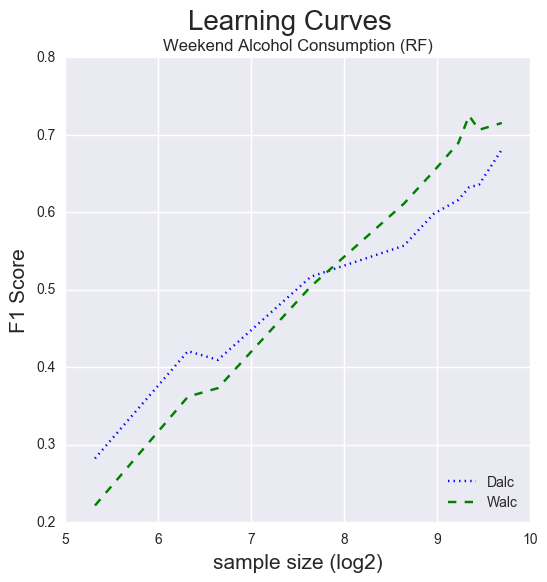

In [17]:
size = [40, 80, 100, 200, 400, 500, 600, 650, 700, 830]
trials = 10
fig = plt.figure(figsize = (6,6))

fig.add_subplot(1,1,1)
f1_list = []
for i, s in enumerate(size):
    f1s = []
    for k in range(5):
        
        X = X_train.sample(n = s)
        Y = y_train.ix[X.index]
        lr = RandomForestClassifier(n_estimators=400, max_features=37, random_state=1)
        lr.fit(X, Y.Dalc_bin)
        pred_D = lr.predict(X_test)
        f1s.append(metrics.f1_score(y_test.Dalc_bin, pred_D))
    f1_list.append(np.array(f1s).mean())



plt.plot(np.log2(np.array(size)), f1_list, 'b:',label='Dalc')
plt.xlabel('sample size (log2)', fontsize = 15)
plt.ylabel('F1 Score', fontsize = 15)
plt.title('Workday Alcohol Consumption (RF)', fontsize = 12)
plt.legend(loc = 4)

fig.add_subplot(1,1,1)
f1_list = []
for i, s in enumerate(size):
    f1s = []
    for k in range(5):
        
        X = X_train.sample(n = s)
        Y = y_train.ix[X.index]
        lr = RandomForestClassifier(n_estimators=200, max_features=33, random_state=1)
        lr.fit(X, Y.Walc_bin)
        pred_W = lr.predict(X_test)
        f1s.append(metrics.f1_score(y_test.Walc_bin, pred_W))
    f1_list.append(np.array(f1s).mean())


plt.plot(np.log2(np.array(size)), f1_list,'g--',label='Walc')
plt.xlabel('sample size (log2)', fontsize = 15)
plt.ylabel('F1 Score', fontsize = 15)
plt.title('Weekend Alcohol Consumption (RF)', fontsize = 12)
plt.legend(loc = 4)
fig.suptitle('Learning Curves', fontsize = 20)